In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
!pip install imbalanced-learn

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# Mean

In [35]:
icu_data = pd.read_csv('/kaggle/input/icu-dataset/icu_data_Mean.csv')

icu_data.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,age,gender,...,zafirlukast,zanamivir,zeas,zileuton,zinc oxide,zinc oxide-white petrolatum,zolmitriptan,zonisamide,zydis,zz
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,55,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,77,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,57,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,81,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
condition = (icu_data['los'] > 4).map({True: 'Long', False: 'Short'})

# Tạo một cột mới 'los_type' dựa trên điều kiện

icu_data['los_type'] = condition

In [37]:
# Chia dữ liệu thành dữ liệu training  và dữ liệu validation

from sklearn.model_selection import train_test_split



# Giả sử 'subject_id' là mã định danh bệnh nhân

patient_ids = icu_data['subject_id'].unique()



# Chia patient_ids thành các tập huấn luyện và thử nghiệm

train_patient_ids, validation_patient_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)



# Lọc khung dữ liệu dựa trên sự phân chia của patient_ids

train_data = icu_data[icu_data['subject_id'].isin(train_patient_ids)]

validation_data = icu_data[icu_data['subject_id'].isin(validation_patient_ids)]



# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra

print("Training set shape:", train_data.shape)

print("Validation set shape:", validation_data.shape)

Training set shape: (45901, 5075)
Validation set shape: (11586, 5075)


In [38]:
# lấy cột subject_id duy nhất

patient_ids_train = train_data['subject_id'].unique()



# Chia patient_ids_train thành các tập huấn luyện và thử nghiệm

train_train_ids, test_train_ids = train_test_split(patient_ids_train, test_size=0.2, random_state=42)



# Lọc train_data dựa trên sự phân chia của patient_ids_train

train_train_data = train_data[train_data['subject_id'].isin(train_train_ids)]

test_train_data = train_data[train_data['subject_id'].isin(test_train_ids)]



# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra

print("Train Training set shape:", train_train_data.shape)

print("Train Testing set shape:", test_train_data.shape)

Train Training set shape: (36738, 5075)
Train Testing set shape: (9163, 5075)


In [47]:
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


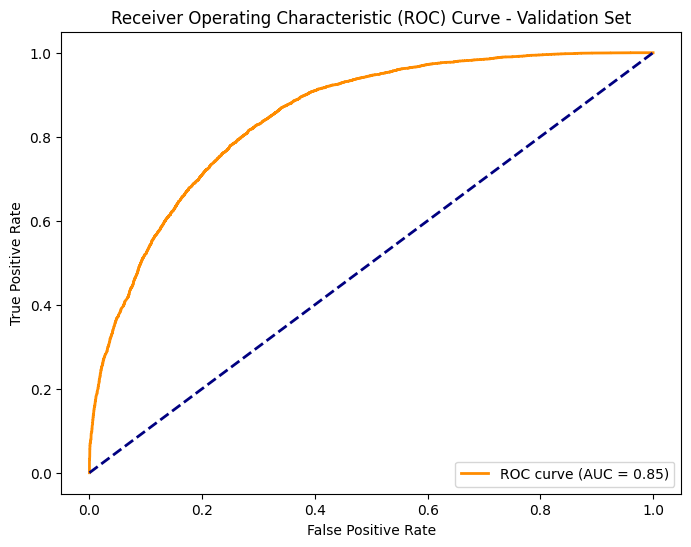

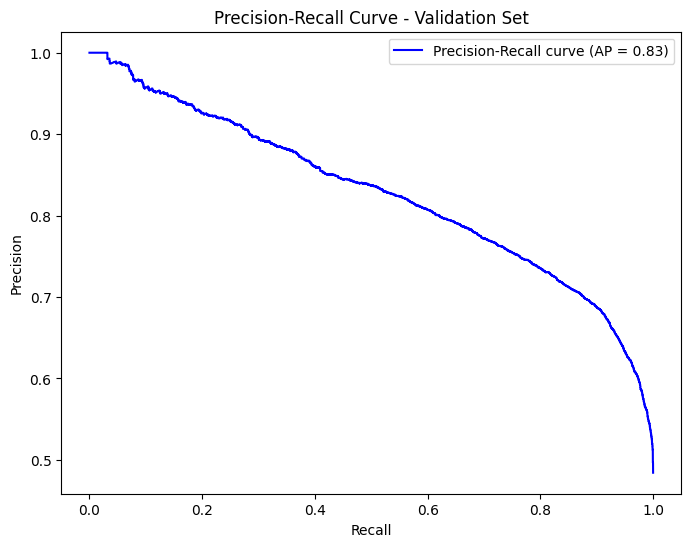

Area under ROC curve (AUC-ROC) for Verification Set: 0.85
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.83
Confusion Matrix for Test Set:
[[2918 5384]
 [ 166 7630]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.35      0.51      8302
           1       0.59      0.98      0.73      7796

    accuracy                           0.66     16098
   macro avg       0.77      0.67      0.62     16098
weighted avg       0.77      0.66      0.62     16098



In [48]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})

# **Áp dụng PCA để giảm chiều dữ liệu trước khi áp dụng ADASYN**
pca = PCA(n_components=0.95)  # Giữ lại 95% biến thiên
X_verify_reduced = pca.fit_transform(X_verify)

# **Sử dụng ADASYN để cân bằng dữ liệu**
adasyn = ADASYN(random_state=42)
X_verify_res, y_verify_res = adasyn.fit_resample(X_verify_reduced, y_verify)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
scaler = StandardScaler()
X_verify_res = scaler.fit_transform(X_verify_res)

# **Sử dụng XGBoost với đánh trọng số lớp**
# Đánh trọng số lớp để giảm thiểu sự thiên lệch giữa các lớp
model = XGBClassifier(
    scale_pos_weight=(y_verify.value_counts()[0] / y_verify.value_counts()[1]),  # Cân bằng trọng số giữa các lớp
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_verify_res, y_verify_res)

# **Dự đoán và tính toán các chỉ số hiệu suất**
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.5
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify_res, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify_res, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify_res, y_verify_pred_prob)

# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify_res, y_verify_pred)
cr_verify = classification_report(y_verify_res, y_verify_pred)

print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print(cr_verify)


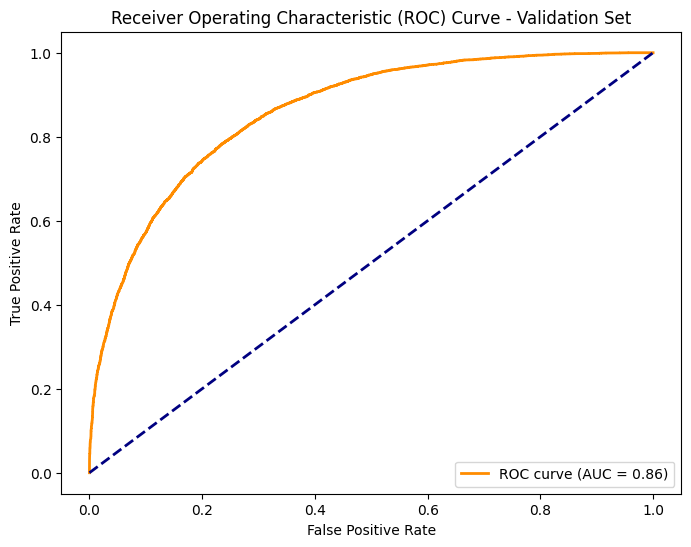

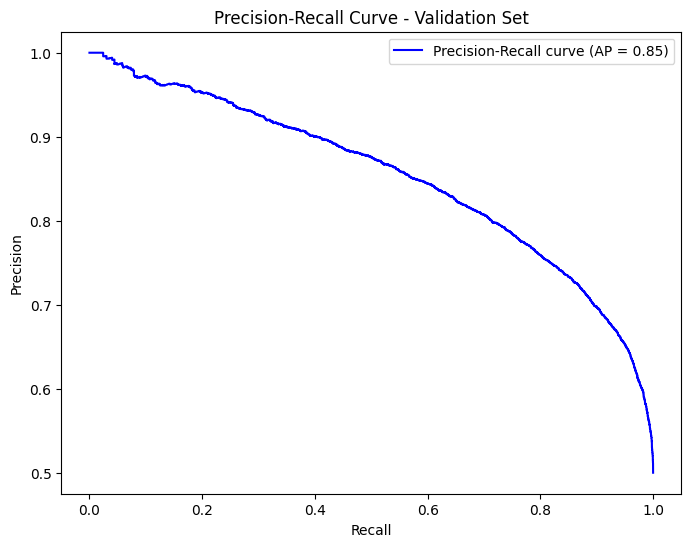

Area under ROC curve (AUC-ROC) for Verification Set: 0.86
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.85
Confusion Matrix for Test Set:
[[3128 5174]
 [ 213 8089]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.38      0.54      8302
           1       0.61      0.97      0.75      8302

    accuracy                           0.68     16604
   macro avg       0.77      0.68      0.64     16604
weighted avg       0.77      0.68      0.64     16604



In [50]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})

# **Áp dụng PCA để giảm chiều dữ liệu trước khi áp dụng SMOTE và ADASYN**
pca = PCA(n_components=0.95)  # Giữ lại 95% biến thiên
X_verify_reduced = pca.fit_transform(X_verify)

# **Kết hợp SMOTE và ADASYN để cân bằng dữ liệu**
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_verify_reduced, y_verify)

# Áp dụng ADASYN sau khi SMOTE để tạo thêm mẫu cho các điểm khó phân loại
adasyn = ADASYN(random_state=42)
X_verify_res, y_verify_res = adasyn.fit_resample(X_smote, y_smote)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
scaler = StandardScaler()
X_verify_res = scaler.fit_transform(X_verify_res)

# **Sử dụng XGBoost với đánh trọng số lớp**
# Đánh trọng số lớp để giảm thiểu sự thiên lệch giữa các lớp
model = XGBClassifier(
    scale_pos_weight=(y_verify.value_counts()[0] / y_verify.value_counts()[1]),  # Cân bằng trọng số giữa các lớp
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_verify_res, y_verify_res)

# **Dự đoán và tính toán các chỉ số hiệu suất**
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.5
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify_res, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify_res, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify_res, y_verify_pred_prob)

# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify_res, y_verify_pred)
cr_verify = classification_report(y_verify_res, y_verify_pred)

print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print(cr_verify)


# Median


In [51]:
icu_data = pd.read_csv('/kaggle/input/icu-dataset/icu_data_Median.csv')

icu_data.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,age,gender,...,zafirlukast,zanamivir,zeas,zileuton,zinc oxide,zinc oxide-white petrolatum,zolmitriptan,zonisamide,zydis,zz
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,55,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,77,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,57,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,81,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
condition = (icu_data['los'] > 4).map({True: 'Long', False: 'Short'})

# Tạo một cột mới 'los_type' dựa trên điều kiện

icu_data['los_type'] = condition

In [53]:
# Chia dữ liệu thành dữ liệu training  và dữ liệu validation

from sklearn.model_selection import train_test_split



# Giả sử 'subject_id' là mã định danh bệnh nhân

patient_ids = icu_data['subject_id'].unique()



# Chia patient_ids thành các tập huấn luyện và thử nghiệm

train_patient_ids, validation_patient_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)



# Lọc khung dữ liệu dựa trên sự phân chia của patient_ids

train_data = icu_data[icu_data['subject_id'].isin(train_patient_ids)]

validation_data = icu_data[icu_data['subject_id'].isin(validation_patient_ids)]



# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra

print("Training set shape:", train_data.shape)

print("Validation set shape:", validation_data.shape)

Training set shape: (45901, 5075)
Validation set shape: (11586, 5075)


In [54]:
# lấy cột subject_id duy nhất

patient_ids_train = train_data['subject_id'].unique()



# Chia patient_ids_train thành các tập huấn luyện và thử nghiệm

train_train_ids, test_train_ids = train_test_split(patient_ids_train, test_size=0.2, random_state=42)



# Lọc train_data dựa trên sự phân chia của patient_ids_train

train_train_data = train_data[train_data['subject_id'].isin(train_train_ids)]

test_train_data = train_data[train_data['subject_id'].isin(test_train_ids)]



# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra

print("Train Training set shape:", train_train_data.shape)

print("Train Testing set shape:", test_train_data.shape)

Train Training set shape: (36738, 5075)
Train Testing set shape: (9163, 5075)


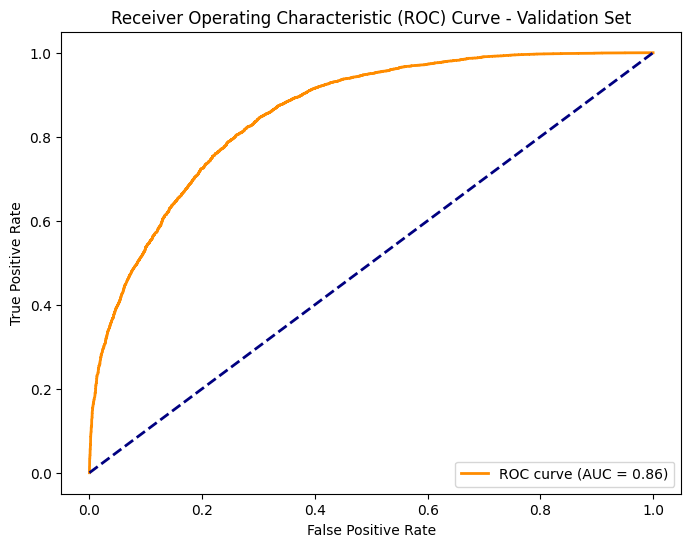

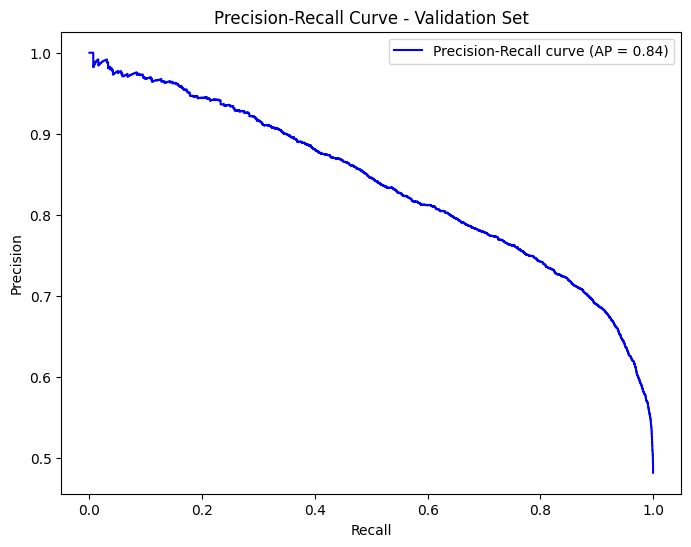

Area under ROC curve (AUC-ROC) for Verification Set: 0.86
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.84
Confusion Matrix for Test Set:
[[2934 5368]
 [ 143 7587]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.35      0.52      8302
           1       0.59      0.98      0.73      7730

    accuracy                           0.66     16032
   macro avg       0.77      0.67      0.62     16032
weighted avg       0.78      0.66      0.62     16032



In [55]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})

# **Áp dụng PCA để giảm chiều dữ liệu trước khi áp dụng ADASYN**
pca = PCA(n_components=0.95)  # Giữ lại 95% biến thiên
X_verify_reduced = pca.fit_transform(X_verify)

# **Sử dụng ADASYN để cân bằng dữ liệu**
adasyn = ADASYN(random_state=42)
X_verify_res, y_verify_res = adasyn.fit_resample(X_verify_reduced, y_verify)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
scaler = StandardScaler()
X_verify_res = scaler.fit_transform(X_verify_res)

# **Sử dụng XGBoost với đánh trọng số lớp**
# Đánh trọng số lớp để giảm thiểu sự thiên lệch giữa các lớp
model = XGBClassifier(
    scale_pos_weight=(y_verify.value_counts()[0] / y_verify.value_counts()[1]),  # Cân bằng trọng số giữa các lớp
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_verify_res, y_verify_res)

# **Dự đoán và tính toán các chỉ số hiệu suất**
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.5
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify_res, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify_res, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify_res, y_verify_pred_prob)

# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify_res, y_verify_pred)
cr_verify = classification_report(y_verify_res, y_verify_pred)

print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print(cr_verify)


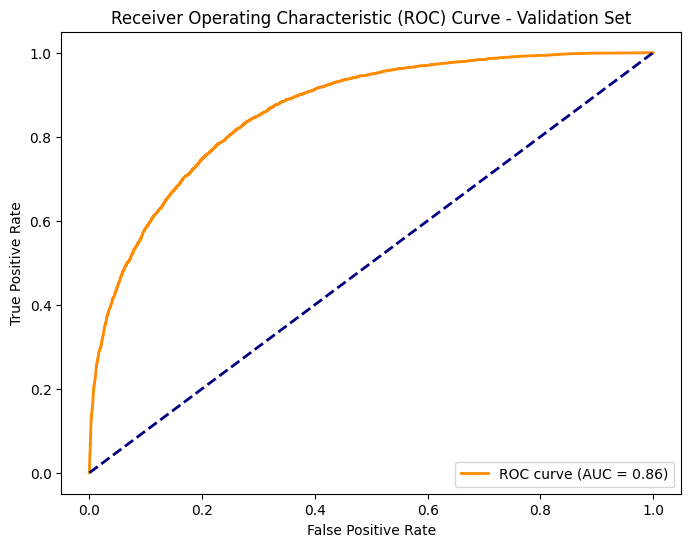

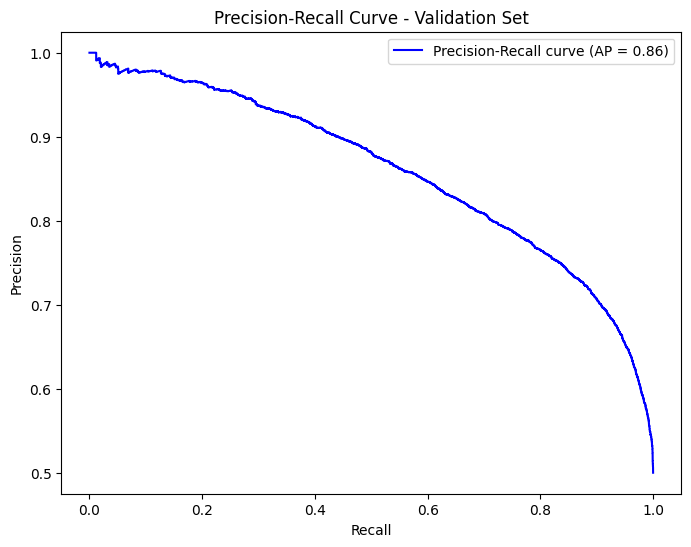

Area under ROC curve (AUC-ROC) for Verification Set: 0.86
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.86
Confusion Matrix for Test Set:
[[3331 4971]
 [ 250 8052]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.40      0.56      8302
           1       0.62      0.97      0.76      8302

    accuracy                           0.69     16604
   macro avg       0.77      0.69      0.66     16604
weighted avg       0.77      0.69      0.66     16604



In [56]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})

# **Áp dụng PCA để giảm chiều dữ liệu trước khi áp dụng SMOTE và ADASYN**
pca = PCA(n_components=0.95)  # Giữ lại 95% biến thiên
X_verify_reduced = pca.fit_transform(X_verify)

# **Kết hợp SMOTE và ADASYN để cân bằng dữ liệu**
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_verify_reduced, y_verify)

# Áp dụng ADASYN sau khi SMOTE để tạo thêm mẫu cho các điểm khó phân loại
adasyn = ADASYN(random_state=42)
X_verify_res, y_verify_res = adasyn.fit_resample(X_smote, y_smote)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
scaler = StandardScaler()
X_verify_res = scaler.fit_transform(X_verify_res)

# **Sử dụng XGBoost với đánh trọng số lớp**
# Đánh trọng số lớp để giảm thiểu sự thiên lệch giữa các lớp
model = XGBClassifier(
    scale_pos_weight=(y_verify.value_counts()[0] / y_verify.value_counts()[1]),  # Cân bằng trọng số giữa các lớp
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_verify_res, y_verify_res)

# **Dự đoán và tính toán các chỉ số hiệu suất**
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.5
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify_res, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify_res, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify_res, y_verify_pred_prob)

# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify_res, y_verify_pred)
cr_verify = classification_report(y_verify_res, y_verify_pred)

print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print(cr_verify)


# Nolm


In [57]:
icu_data = pd.read_csv('/kaggle/input/icu-dataset/icu_data_Nolm.csv')

icu_data.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,age,gender,...,zafirlukast,zanamivir,zeas,zileuton,zinc oxide,zinc oxide-white petrolatum,zolmitriptan,zonisamide,zydis,zz
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,55,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,77,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,57,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,81,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
condition = (icu_data['los'] > 4).map({True: 'Long', False: 'Short'})

# Tạo một cột mới 'los_type' dựa trên điều kiện

icu_data['los_type'] = condition

In [59]:
# Chia dữ liệu thành dữ liệu training  và dữ liệu validation

from sklearn.model_selection import train_test_split



# Giả sử 'subject_id' là mã định danh bệnh nhân

patient_ids = icu_data['subject_id'].unique()



# Chia patient_ids thành các tập huấn luyện và thử nghiệm

train_patient_ids, validation_patient_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)



# Lọc khung dữ liệu dựa trên sự phân chia của patient_ids

train_data = icu_data[icu_data['subject_id'].isin(train_patient_ids)]

validation_data = icu_data[icu_data['subject_id'].isin(validation_patient_ids)]



# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra

print("Training set shape:", train_data.shape)

print("Validation set shape:", validation_data.shape)

Training set shape: (45901, 5075)
Validation set shape: (11586, 5075)


In [60]:
# lấy cột subject_id duy nhất

patient_ids_train = train_data['subject_id'].unique()



# Chia patient_ids_train thành các tập huấn luyện và thử nghiệm

train_train_ids, test_train_ids = train_test_split(patient_ids_train, test_size=0.2, random_state=42)



# Lọc train_data dựa trên sự phân chia của patient_ids_train

train_train_data = train_data[train_data['subject_id'].isin(train_train_ids)]

test_train_data = train_data[train_data['subject_id'].isin(test_train_ids)]



# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra

print("Train Training set shape:", train_train_data.shape)

print("Train Testing set shape:", test_train_data.shape)

Train Training set shape: (36738, 5075)
Train Testing set shape: (9163, 5075)


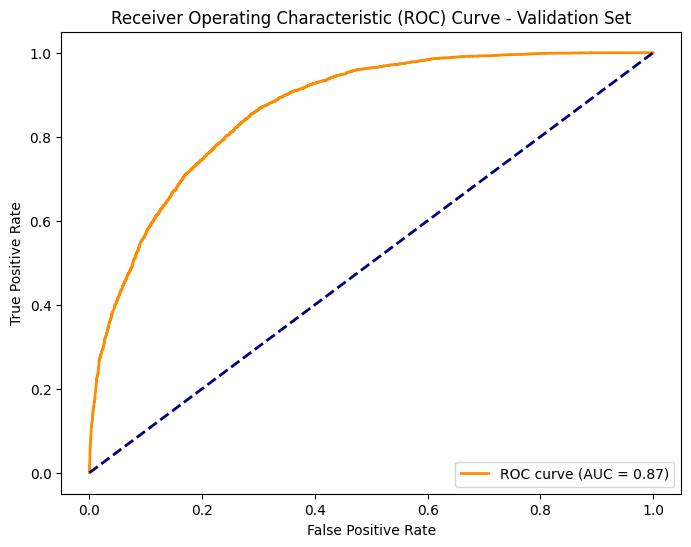

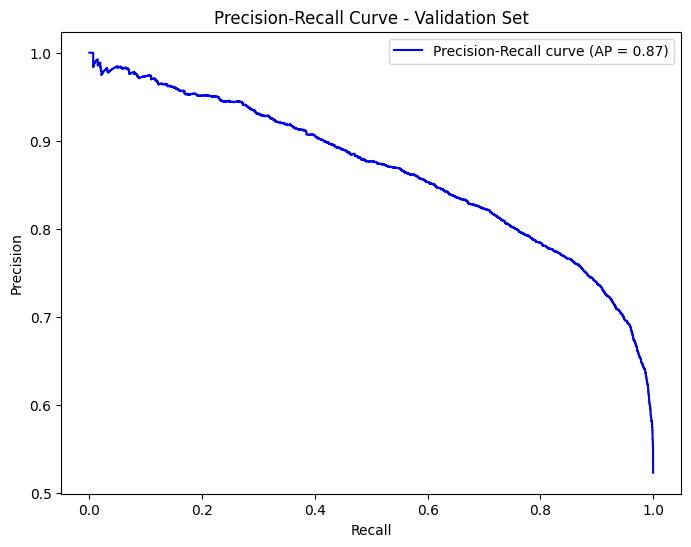

Area under ROC curve (AUC-ROC) for Verification Set: 0.87
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.87
Confusion Matrix for Test Set:
[[3443 4859]
 [ 180 8925]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.41      0.58      8302
           1       0.65      0.98      0.78      9105

    accuracy                           0.71     17407
   macro avg       0.80      0.70      0.68     17407
weighted avg       0.79      0.71      0.68     17407



In [61]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})

# **Áp dụng PCA để giảm chiều dữ liệu trước khi áp dụng ADASYN**
pca = PCA(n_components=0.95)  # Giữ lại 95% biến thiên
X_verify_reduced = pca.fit_transform(X_verify)

# **Sử dụng ADASYN để cân bằng dữ liệu**
adasyn = ADASYN(random_state=42)
X_verify_res, y_verify_res = adasyn.fit_resample(X_verify_reduced, y_verify)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
scaler = StandardScaler()
X_verify_res = scaler.fit_transform(X_verify_res)

# **Sử dụng XGBoost với đánh trọng số lớp**
# Đánh trọng số lớp để giảm thiểu sự thiên lệch giữa các lớp
model = XGBClassifier(
    scale_pos_weight=(y_verify.value_counts()[0] / y_verify.value_counts()[1]),  # Cân bằng trọng số giữa các lớp
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_verify_res, y_verify_res)

# **Dự đoán và tính toán các chỉ số hiệu suất**
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.5
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify_res, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify_res, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify_res, y_verify_pred_prob)

# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify_res, y_verify_pred)
cr_verify = classification_report(y_verify_res, y_verify_pred)

print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print(cr_verify)


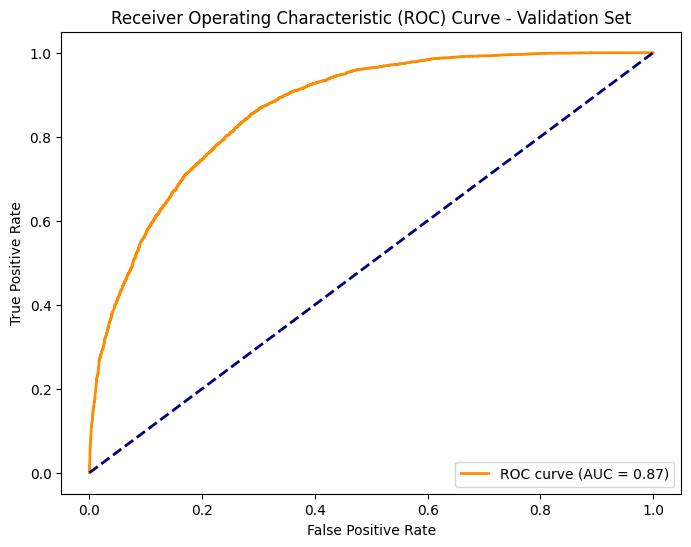

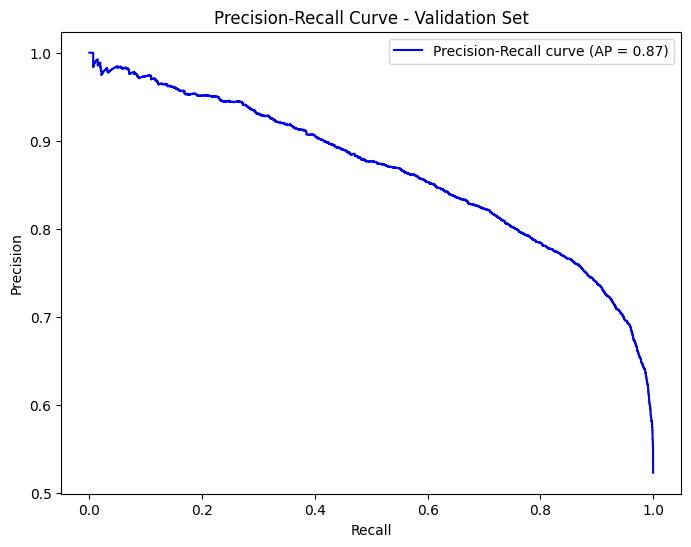

Area under ROC curve (AUC-ROC) for Verification Set: 0.87
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.87
Confusion Matrix for Test Set:
[[3443 4859]
 [ 180 8925]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.41      0.58      8302
           1       0.65      0.98      0.78      9105

    accuracy                           0.71     17407
   macro avg       0.80      0.70      0.68     17407
weighted avg       0.79      0.71      0.68     17407



In [62]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})

# **Áp dụng PCA để giảm chiều dữ liệu trước khi áp dụng ADASYN**
pca = PCA(n_components=0.95)  # Giữ lại 95% biến thiên
X_verify_reduced = pca.fit_transform(X_verify)

# **Sử dụng ADASYN để cân bằng dữ liệu**
adasyn = ADASYN(random_state=42)
X_verify_res, y_verify_res = adasyn.fit_resample(X_verify_reduced, y_verify)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
scaler = StandardScaler()
X_verify_res = scaler.fit_transform(X_verify_res)

# **Sử dụng XGBoost với đánh trọng số lớp**
# Đánh trọng số lớp để giảm thiểu sự thiên lệch giữa các lớp
model = XGBClassifier(
    scale_pos_weight=(y_verify.value_counts()[0] / y_verify.value_counts()[1]),  # Cân bằng trọng số giữa các lớp
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_verify_res, y_verify_res)

# **Dự đoán và tính toán các chỉ số hiệu suất**
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.5
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify_res, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify_res, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify_res, y_verify_pred_prob)

# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify_res, y_verify_pred)
cr_verify = classification_report(y_verify_res, y_verify_pred)

print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print(cr_verify)
